In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## simple function 
# def func(x):
#     opt = [1, 2]
#     return ((x - opt) ** 2).sum()

# def grad(x):
#     opt = [1, 2]
#     return 2 * (x - opt) 
    
# def hess(x):
#     return np.array([[2, 0], [0, 2]])

## difficult function 
def func(x):
    f = (1 - x[0]) ** 2 + 100 * ((x[1] - x[0] ** 2)) ** 2
    return f

def grad(x):
    g1 = 2 * (x[0] - 1) + 400 * (x[0] ** 2 - x[1]) * x[0]
    g2 = 200 * (x[1] - x[0] ** 2)
    return np.array([g1, g2])
    
def hess(x):
    g11 = 2 + 400 * (3 * x[0] ** 2 - x[1])
    g12, g21 = -400 * x[0], -400 * x[0]
    g22 = 200
    return np.array([[g11, g12], [g21, g22]])

In [91]:
def LM(x0, mu0, err):
    path = []
    x, mu, f, g, G = x0, mu0, func(x0), grad(x0), hess(x0)
    while np.linalg.norm(g) > err:
        u, d, v = np.linalg.svd(G + mu * np.eye(len(x0)))
        while d[-1] <= 0:
            mu = 4 * mu0
            u, d, v = np.linalg.svd(G + mu * np.eye(len(x0))) 
        s = -u @ np.diag(1 / d) @ v @ g
        _f = func(x + s)
        q = f + g.T @ s + 1 / 2 * s.T @ G @ s
        r = (_f - f) / (q - f)
        f = _f
        mu = 4 * mu if r < 0.25 else (mu / 2 if r > 0.75 else mu)
        if r > 0:
            x = x + s 
        f, g, G = func(x), grad(x), hess(x)
        path.append((x[0], x[1], f))
    return path

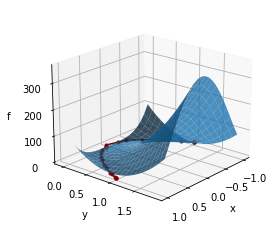

In [120]:
mu, err = 1, 0.0001
x0 = np.array([-1, 2])
path = LM(x0, mu, err)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.view_init(20, 40)


x, y, z = zip(*path)
ax.plot3D(x, y, z, 'maroon', marker=".")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f")


X = np.arange(-1, 1, 0.1)
Y = np.arange(0, 2, 0.1)
Z = np.array([[func(np.array([x, y])) for x in X] for y in Y])
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.8)